# Data cleaning


In [100]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
#Loading the dataset
df = pd.read_csv('../data/new_retail_data.csv',parse_dates=["Date"])

In [102]:
df.shape

(302010, 30)

In [124]:
df.head()

,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,dortmund,berlin,germany,21.0,male,low,regular,2023-09-18,3.0,108.028757,324.086270,clothing,nike,shorts,excellent,same-day,debit_card,shipped,5.0,cycling_shorts
1,nottingham,england,united kingdom,19.0,female,low,premium,2023-12-31,2.0,403.353907,806.707815,electronics,samsung,tablet,excellent,standard,credit_card,processing,4.0,lenovo_tab
2,geelong,new south wales,australia,48.0,male,low,regular,2023-04-26,3.0,354.477600,1063.432799,books,penguin_books,children's,average,same-day,credit_card,processing,2.0,sports_equipment
3,edmonton,ontario,canada,56.0,male,high,premium,2023-05-08,7.0,352.407717,2466.854021,home_decor,home_depot,tools,excellent,standard,paypal,processing,4.0,utility_knife
4,bristol,england,united kingdom,22.0,male,low,premium,2024-01-10,2.0,124.276524,248.553049,grocery,nestle,chocolate,bad,standard,cash,shipped,1.0,chocolate_cookies


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    301677 non-null  float64       
 1   Customer_ID       301702 non-null  float64       
 2   Name              301628 non-null  object        
 3   Email             301663 non-null  object        
 4   Phone             301648 non-null  float64       
 5   Address           301695 non-null  object        
 6   City              301762 non-null  object        
 7   State             301729 non-null  object        
 8   Zipcode           301670 non-null  float64       
 9   Country           301739 non-null  object        
 10  Age               301837 non-null  float64       
 11  Gender            301693 non-null  object        
 12  Income            301720 non-null  object        
 13  Customer_Segment  301795 non-null  object        
 14  Date

In [104]:
#These are safe to drop
drop_cols = [
    "Transaction_ID", "Customer_ID", "Name", "Email", "Phone", 
    "Address", "Zipcode", "Time", "Year", "Month"
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   City              301762 non-null  object        
 1   State             301729 non-null  object        
 2   Country           301739 non-null  object        
 3   Age               301837 non-null  float64       
 4   Gender            301693 non-null  object        
 5   Income            301720 non-null  object        
 6   Customer_Segment  301795 non-null  object        
 7   Date              301651 non-null  datetime64[ns]
 8   Total_Purchases   301649 non-null  float64       
 9   Amount            301653 non-null  float64       
 10  Total_Amount      301660 non-null  float64       
 11  Product_Category  301727 non-null  object        
 12  Product_Brand     301729 non-null  object        
 13  Product_Type      302010 non-null  object        
 14  Feed

In [105]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    print(f"\n--- {col.upper()} ---")
    print(df[col].value_counts(dropna=False).head(30))



--- CITY ---
City
Chicago          21652
Portsmouth       20131
San Francisco    12188
Frankfurt        10182
Boston            9416
New York          5455
Fort Worth        5206
London            4481
Winnipeg          2406
Birmingham        2382
Mackay            2357
Calgary           2348
Geelong           2340
Edmonton          2339
Victoria          2325
Leeds             2322
Edinburgh         2317
Bendigo           2316
Hobart            2308
Perth             2307
Plymouth          2306
Townsville        2302
Darwin            2298
Toronto           2297
Brisbane          2297
Stuttgart         2296
Bielefeld         2296
Saskatoon         2293
Hanover           2291
Munich            2290
Name: count, dtype: int64

--- STATE ---
State
England            63059
Berlin             52822
New South Wales    45317
Ontario            45312
Connecticut        21658
Maine              12193
Georgia             9504
Kansas              5516
New Mexico          5199
New York           

In [106]:
df.isnull().sum()

City                248
State               281
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [107]:
# Fill missing categorical values
cat_cols = ["City","State","Country","Gender","Income","Customer_Segment",
            "Product_Category","Product_Brand","Product_Type",
            "Feedback","Shipping_Method","Payment_Method","Order_Status"]

for col in cat_cols:
    df[col] = df[col].fillna("unknown").astype(str).str.lower().str.strip()

In [108]:
# Drop unusable rows
df = df[df["Date"].notna()]
df = df[df["Total_Purchases"].notna()]

# Numeric fixes
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].median())
df["Amount"] = df["Amount"].fillna(0)
df["Total_Amount"] = df["Total_Amount"].fillna(0)



In [109]:
# Fix spelling errors in Product Brand
df["Product_Brand"] = df["Product_Brand"].replace({
    "whirepool": "whirlpool",
    "mitsubhisi": "mitsubishi",
    "bluestar": "blue star"
})

In [110]:
#"uk" → "united kingdom"

df["Country"] = df["Country"].replace({
    "uk": "united kingdom"
})

In [111]:
# Convert "home decor" → "home_decor"
# Spaces in category names can cause issues in ML encoding.

df["Product_Category"] = df["Product_Category"].str.replace(" ", "_")

In [112]:
# Convert "blue star" → "blue_star"

df["Product_Brand"] = df["Product_Brand"].str.replace(" ", "_")

In [113]:
# Replace spaces with underscores:

df["Product_Type"] = df["Product_Type"].str.replace(" ", "_")

In [114]:
df["Payment_Method"] = df["Payment_Method"].str.replace(" ", "_")


In [115]:
# Because models do better with clean tokens:

df["products"] = (
    df["products"]
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("[^a-zA-Z0-9_]", "", regex=True)
)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301290 entries, 0 to 302009
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   City              301290 non-null  object        
 1   State             301290 non-null  object        
 2   Country           301290 non-null  object        
 3   Age               301290 non-null  float64       
 4   Gender            301290 non-null  object        
 5   Income            301290 non-null  object        
 6   Customer_Segment  301290 non-null  object        
 7   Date              301290 non-null  datetime64[ns]
 8   Total_Purchases   301290 non-null  float64       
 9   Amount            301290 non-null  float64       
 10  Total_Amount      301290 non-null  float64       
 11  Product_Category  301290 non-null  object        
 12  Product_Brand     301290 non-null  object        
 13  Product_Type      301290 non-null  object        
 14  Feedback 

In [117]:
df.describe()

,Age,Date,Total_Purchases,Amount,Total_Amount,Ratings
count,301290.000000,301290,301290.000000,301290.000000,301290.000000,301290.000000
mean,35.480547,2023-08-30 16:24:11.327292928,5.360005,254.865378,1366.147512,3.162355
min,18.000000,2023-03-01 00:00:00,1.000000,0.000000,0.000000,1.000000
25%,22.000000,2023-05-31 00:00:00,3.000000,132.539385,437.470723,2.000000
50%,32.000000,2023-08-31 00:00:00,5.000000,255.191178,1039.503023,3.000000
75%,46.000000,2023-11-30 00:00:00,8.000000,377.475478,2028.122363,4.000000
max,70.000000,2024-02-29 00:00:00,10.000000,499.997911,4999.625796,5.000000
std,15.019372,NaN,2.868408,141.566809,1129.224613,1.320433


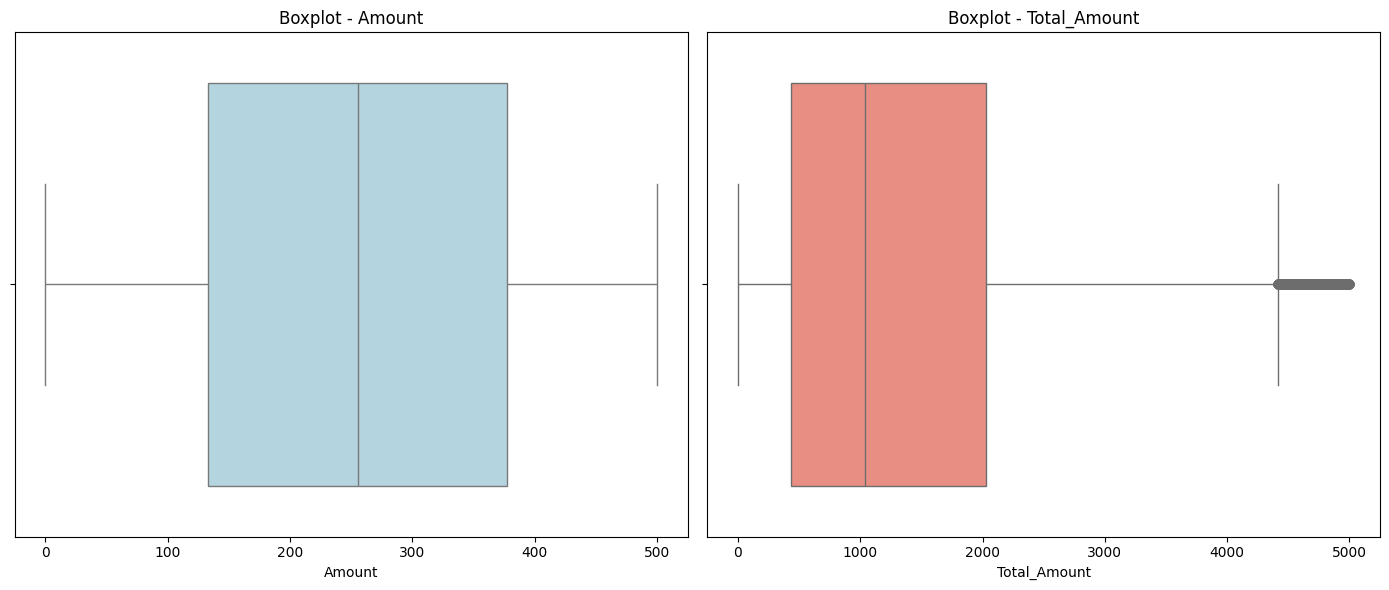

In [118]:

plt.figure(figsize=(14,6))

# Amount boxplot
plt.subplot(1,2,1)
sns.boxplot(x=df["Amount"], color="lightblue")
plt.title("Boxplot - Amount")

# Total_Amount boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df["Total_Amount"], color="salmon")
plt.title("Boxplot - Total_Amount")

plt.tight_layout()
plt.show()

In [119]:
def find_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

# Detect outliers for Total_Amount
lower, upper = find_outliers(df["Total_Amount"])
outliers_total_amount = df[(df["Total_Amount"] < lower) | (df["Total_Amount"] > upper)]

print("Total outlier rows:", len(outliers_total_amount))
outliers_total_amount.head(20)

Total outlier rows: 3922


,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
150,portsmouth,england,united kingdom,51.0,female,low,regular,2023-06-06,10.0,488.528716,4885.287161,electronics,samsung,television,average,same-day,debit_card,pending,2.0,android_tv
159,portsmouth,england,united kingdom,63.0,male,medium,regular,2023-03-04,10.0,485.077362,4850.773617,books,penguin_books,children's,bad,standard,debit_card,delivered,1.0,art_supplies
395,portsmouth,england,united kingdom,23.0,male,low,regular,2023-12-05,10.0,448.712769,4487.127690,clothing,zara,jeans,average,same-day,debit_card,delivered,2.0,distressed_jeans
400,portsmouth,england,united kingdom,22.0,female,low,regular,2023-04-20,10.0,451.867787,4518.677874,grocery,pepsi,juice,good,standard,credit_card,processing,3.0,grapefruit_juice
484,portsmouth,england,united kingdom,46.0,male,medium,regular,2023-11-26,10.0,475.534661,4755.346608,books,penguin_books,non-fiction,bad,same-day,cash,delivered,1.0,history
494,portsmouth,england,united kingdom,59.0,male,high,regular,2023-05-06,10.0,466.721604,4667.216035,books,penguin_books,fiction,excellent,express,cash,delivered,4.0,adventure
694,portsmouth,england,united kingdom,50.0,female,high,regular,2023-05-17,10.0,456.826524,4568.265235,home_decor,bed_bath_&_beyond,bathroom,good,same-day,credit_card,unknown,3.0,sink
722,portsmouth,england,united kingdom,21.0,male,high,regular,2023-04-27,10.0,452.736956,4527.369557,grocery,nestle,snacks,average,same-day,paypal,shipped,2.0,pretzels
729,portsmouth,england,united kingdom,21.0,male,high,regular,2023-05-05,9.0,497.104963,4473.944670,electronics,sony,headphones,good,standard,cash,processing,4.0,sports_headphones
780,portsmouth,england,united kingdom,21.0,female,high,regular,2023-08-29,10.0,449.151725,4491.517254,electronics,sony,television,average,standard,paypal,shipped,2.0,plasma_tv


In [120]:
df["Total_Amount"] = df["Total_Amount"].clip(lower=lower, upper=upper)


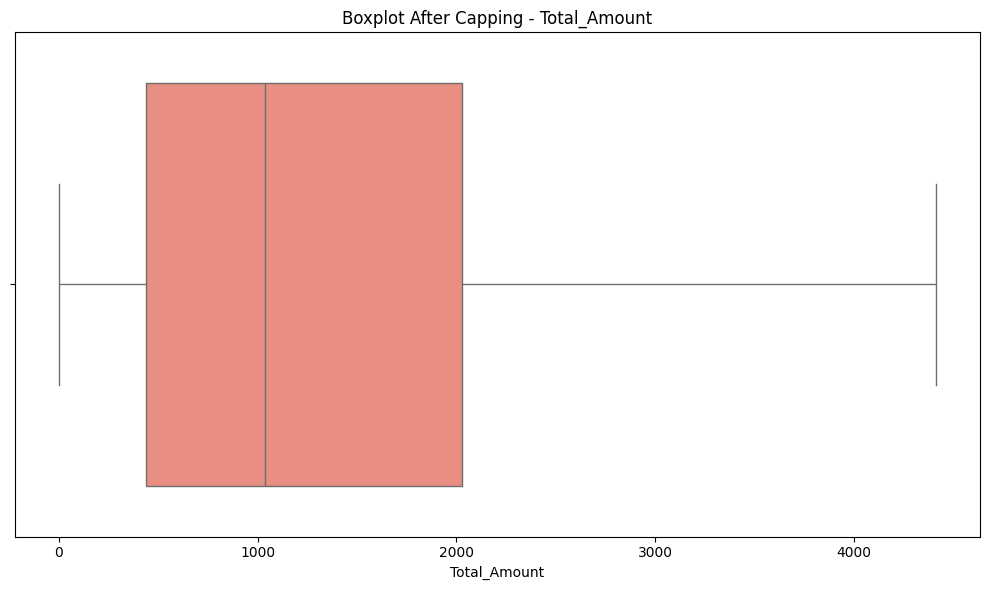

In [121]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Total_Amount"], color="salmon")
plt.title("Boxplot After Capping - Total_Amount")
plt.tight_layout()
plt.show()

In [123]:
df.to_csv('../data/cleaned_retail_data.csv', index=False)